# scikit-geometry

In [ ]:
import skgeom
from skgeom.draw import draw

a = skgeom.Point2(4, 5)
b = skgeom.Point2(2, 1)
c = skgeom.Point2(3, 6)
d = skgeom.Point2(5,2)
print('a:', a)


draw(a, color='purple')


VectorC2(-1, 1)


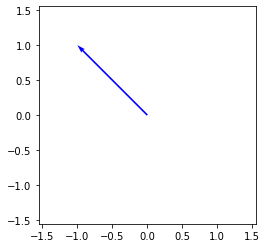

In [4]:
vector = skgeom.Vector2(a, c)
print(vector)
draw(vector, display_range=1.5, color='blue')

RayC2(PointC2(4, 5), PointC2(5, 2))


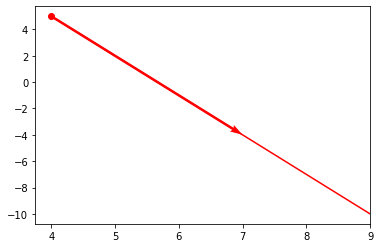

In [5]:
ray = skgeom.Ray2(a, d)
print(ray)
draw(ray, arrow=True, color='red')


Polygon_2(
  PointC2(4, 5)
  PointC2(3, 6)
  PointC2(2, 1)
  PointC2(5, 2)
)



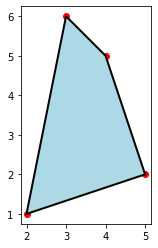

In [6]:
polygon = skgeom.Polygon([a, c, b, d])
print(polygon)
draw(polygon, facecolor='lightblue', point_color='red')

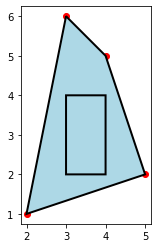

In [8]:
e = skgeom.Point2(3,2)
f = skgeom.Point2(4,2)
g = skgeom.Point2(4,4)
h = skgeom.Point2(3,4)
polygon2 = skgeom.Polygon([e, f, g, h])
polygon_with_holes = skgeom.PolygonWithHoles(polygon, [polygon2])
draw(polygon, polygon_with_holes=polygon_with_holes, facecolor='lightblue', point_color='red')

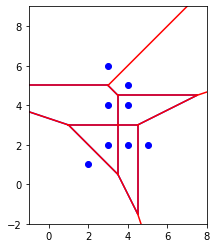

In [10]:
from skgeom import voronoi

point_list+= [e, f, g, h]
voronoi_diagram = voronoi.VoronoiDiagram()
for point in point_list:
    voronoi_diagram.insert(point)
print(voronoi_diagram)
draw(voronoi_diagram, visible_point=False, sites_color='blue', finite_edges_color='red')

In [14]:
import skgeom as sg
a = sg.Segment2(sg.Point2(3, 5), sg.Point2(0, -2))
b = sg.Segment2(sg.Point2(5, 3), sg.Point2(-2, -2))
i = sg.intersection(a, b)
print(i)

PointC2(0.882353, 0.0588235)


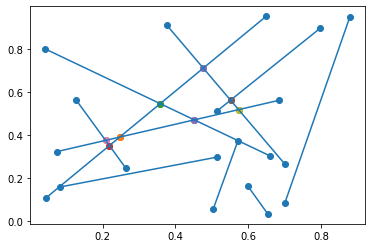

In [15]:
from random import random as r
import itertools
segments = []
for i in range(10):
    segments.append(sg.Segment2(sg.Point2(r(), r()),
                                sg.Point2(r(), r())))

intersections = []
for s1, s2 in itertools.permutations(segments, 2):
    isect = sg.intersection(s1, s2)
    if isect:
        intersections.append(isect)

for s in segments:
    draw(s)
for i in intersections:
    draw(i)

# Shapely

In [16]:
from shapely.geometry import Polygon


Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).minimum_clearance

1.0

## Point

In [2]:
from shapely.geometry import Point
point = Point(1, 1)
line = LineString([(2, 0), (2, 4), (3, 4)])
point.hausdorff_distance(line)
#  The Hausdorff distance between two geometries is the furthest distance that 
# a point on either geometry can be from the nearest point to it on the other geometry.

3.605551275463989

In [3]:
point.distance(Point(3, 4))

3.605551275463989

In [4]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut.centroid.wkt

'POINT (0.0000000000000001 0)'

In [5]:
donut.representative_point().wkt

'POINT (1.4975923633360986 0.0490085701647802)'

In [11]:
point = Point(1, 1)
point.length
point.bounds
point.coords[:]

[(1.0, 1.0)]

## LineString

In [22]:
from shapely.geometry import LineString
# spline

line = LineString([(0, 0), (1, 1)])
line.coords[:]
line.area

0.0

In [23]:
line.length

1.4142135623730951

## LinearRing

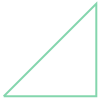

In [36]:
from shapely.geometry import LinearRing
# closed spline
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
ring

In [ ]:
ring.area

In [21]:
ring.length

3.414213562373095

In [25]:
ring.bounds

(0.0, 0.0, 1.0, 1.0)

## Polygon

如果内部空洞的边和模型的外边重叠，或者点重叠都会是无效的，即使内部的多个空洞的边或点有重叠也是无效的。shapely在创建时不会检查是否有效，只有在操作模型时才会报错。

In [26]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon.area

0.5

In [27]:
polygon.length

3.414213562373095

In [28]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

In [29]:
list(polygon.exterior.coords)

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [30]:
list(polygon.interiors)

[]

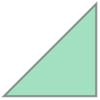

In [34]:
# The Polygon constructor also accepts instances of LineString and LinearRing.
coords = [(0, 0), (1, 1), (1, 0)]
r = LinearRing(coords)
s = Polygon(r)
s.area
s

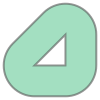

In [35]:
t = Polygon(s.buffer(1.0).exterior, [r])
t.area
t

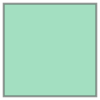

In [33]:
from shapely.geometry import box
b = box(0.0, 0.0, 1.0, 1.0)
b

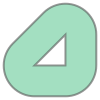

In [50]:
from shapely.geometry.polygon import orient
ot = orient(t, 0.50)
ot

## Collections

多种元素可以合并成为集合


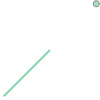

In [54]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
x = a.intersection(b)
x

In [56]:
from pprint import pprint

pprint(list(x.geoms))

### Collections of Points

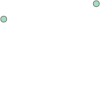

In [60]:
from shapely.geometry import MultiPoint
points = MultiPoint([(0.0, 0.0), (12.0, 2.0)])
points.bounds

points

### Collections of Lines

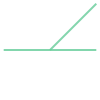

In [62]:
from shapely.geometry import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

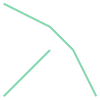

In [63]:
from shapely.geometry import MultiLineString

mline1 = MultiLineString([((0, 0), (1, 1)), ((0, 2),  (1, 1.5), (1.5, 1), (2, 0))])
mline1

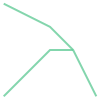

In [65]:
mline2 = MultiLineString([((0, 0), (1, 1), (1.5, 1)), ((0, 2), (1, 1.5), (1.5, 1), (2, 0))])
mline2

### Collections of Polygons

In [66]:
polygons = MultiPolygon([polygon, s, t])
len(polygons.geoms)

3

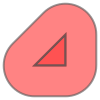

In [67]:
polygons

In [68]:
polygons.bounds

(-1.0, -1.0, 2.0, 2.0)

## Empty features

In [69]:
line = LineString()
line.is_empty

True

## Coordinate sequences

In [70]:
line = LineString([(0, 1), (2, 3), (4, 5)])
line.coords

In [71]:
line.coords[1:]

[(2.0, 3.0), (4.0, 5.0)]

In [72]:
for x, y in line.coords:
    print("x={}, y={}".format(x, y))

x=0.0, y=1.0
x=2.0, y=3.0
x=4.0, y=5.0


## Linear Referencing Methods

LineStrings或MultiLineStrings上一维定位参数

Shapely supports linear referencing based on length or distance, evaluating the distance along a geometric object to the projection of a given point, or the point at a given distance along the object.

- interpolate()
    
    Return a point at the specified distance along a linear geometric object.
    输入一个距离值（亦可标准化），返回线性模型（线）上该长度位置的点。
    
    
- project()
    
    Returns the distance along this geometric object to a point nearest the other object.
    输入一个点，返回该点距离令一个模型最近位置的点的距离值。
    

In [93]:
l =  LineString([(0, 0), (0, 1), (1, 1)])
ip = l.interpolate(1.5) 
# interpolate()
# Return a point at the specified distance along a linear geometric object.
# 输入一个距离值（亦可标准化），返回线性模型（线）上该长度位置的点。
rs = [l, ip]
ip.wkt

'POINT (0.5 1)'

In [96]:
# project()
# Returns the distance along this geometric object to a point nearest the other object.
# 输入一个点，返回该点距离令一个模型最近位置的点的距离值。
ip = Point((0.5,1.5))
LineString([(0, 0), (0, 1), (1, 1)]).project(ip)
rp = l.interpolate(1.5)
rp.wkt

'POINT (0.5 1)'

In [97]:
def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]
        


In [98]:
line = LineString([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)])
pprint([list(x.coords) for x in cut(line, 1.0)])

[[(0.0, 0.0), (1.0, 0.0)],
 [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]


## Predicates and Relationships

Whether unary or binary, all return **True or False**.

### Unary Predicates

Standard unary predicates are implemented as **read-only** property attributes.

In [99]:
Point(0, 0).has_z

False

In [100]:
Point(0, 0, 0).has_z

True

In [101]:
LinearRing([(1,0), (1,1), (0,0)]).is_ccw
# counter-clockwise

True

In [102]:
LinearRing([(1,0), (1,1), (0,0)]).is_ccw
ring.is_ccw

False

In [105]:
ring.coords = list(ring.coords)[::-1]
ring.is_ccw

True

In [106]:
Point().is_empty

True

In [107]:
from operator import attrgetter
empties = filter(attrgetter('is_empty'), [Point(), Point(0, 0)])
len(empties)

TypeError: object of type 'filter' has no len()

In [108]:
LineString([(0, 0), (1, 1), (1, -1)]).is_ring

False

In [109]:
LinearRing([(0, 0), (1, 1), (1, -1)]).is_ring

True

In [110]:
# Returns True if the feature does not cross itself.
LineString([(0, 0), (1, 1), (1, -1), (0, 1)]).is_simple

False

In [111]:
LineString([(0, 0), (1, 1), (1, -1)]).is_simple

True

In [112]:
MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)]).is_valid

False

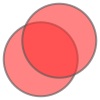

In [113]:
MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)])

In [116]:
from functools import wraps
from shapely.geos import TopologicalError

def validate(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        ob = func(*args, **kwargs)
        if not ob.is_valid:
            raise TopologicalError(
                "Given arguments do not determine a valid geometric object")
        return ob
    return wrapper

@validate
def ring(coordinates):
    return LinearRing(coordinates)

coords = [(0, 0), (1, 1), (1, -1), (0, 1)]

ring(coords)

# TopologicalError: Given arguments do not determine a valid geometric object

TopologicalError: Given arguments do not determine a valid geometric object

### Binary Predicates
Standard binary predicates are implemented as **methods**.

- object.\_\_eq\_\_(other)
    
    Returns True if the two objects are of the same geometric type, and the coordinates of the two objects match precisely.
    

- object.equals(other)
    
    Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.
    
    
- object.almost_equals(other\[, decimal=6\])
    
    Returns True if the object is approximately equal to the other at all points to specified decimal place precision.


- object.contains(other)
    
    Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.


- object.covers(other)
    
    Returns True if every point of other is a point on the interior or boundary of object. This is similar to object.contains(other) except that this does not require any interior points of other to lie in the interior of object.


- object.covered_by(other)
    
    Returns True if every point of object is a point on the interior or boundary of other. This is equivalent to other.covers(object).


- object.crosses(other)

    Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.
    
    

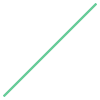

In [120]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
c = LineString([(0, 0), (0, 0), (1, 1)])


In [121]:
a.equals(b)

True

In [122]:
a == b

False

In [123]:
b.equals(c)

True

In [124]:
b == c

False

In [125]:
coords = [(0, 0), (1, 1)]
LineString(coords).contains(Point(0.5, 0.5))

True

In [126]:
Point(0.5, 0.5).within(LineString(coords))

True

In [127]:
LineString(coords).contains(Point(1.0, 1.0))

False

In [133]:
line = LineString(coords)
contained = filter(line.contains, [Point(), Point(0.5, 0.5)])
[p.wkt for p in contained]

['POINT (0.5 0.5)']

In [137]:
coords = [(0, 0), (1, 1)]

LineString(coords).crosses(LineString([(0, 1), (1, 0)]))

True

In [138]:
LineString(coords).crosses(Point(0.5, 0.5))

# A line does not cross a point that it contains.

False

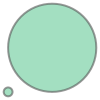

In [154]:
MultiPolygon([Point(0, 0).buffer(0.1),Point(1, 1).buffer(1)])

In [145]:
Point(0, 0).buffer(0.1).disjoint(Point(1, 1).buffer(1))
# Returns True if the boundary and interior of the object do not intersect at all 
# with those of the other.

True

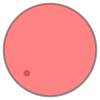

In [152]:
MultiPolygon([Point(0, 0).buffer(0.1),Point(1, 1).buffer(2)])

In [153]:
Point(0, 0).buffer(0.1).disjoint(Point(1, 1).buffer(2))
# Returns True if the boundary and interior of the object do not intersect at all 
# with those of the other.

False

**object.intersects(other)**

Returns True if the boundary or interior of the object intersect in any way with those of the other.

In other words, geometric objects intersect if they have any boundary or interior point in common.

**object.overlaps(other)**

Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.

**object.touches(other)**

Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.

In [155]:
Point(0, 0).buffer(0.1).intersects(Point(1, 1).buffer(2))

True

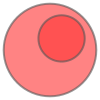

In [159]:

MultiPolygon([Point(0, 0).buffer(4),Point(1, 1).buffer(2)])

In [160]:
Point(0, 0).buffer(4).overlaps(Point(1, 1).buffer(2))

False

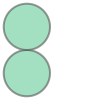

In [163]:
MultiPolygon([Point(0, 0).buffer(0.5),Point(0, 1).buffer(0.5)])

In [165]:
Point(0, 0).buffer(0.5).touches(Point(0, 1).buffer(0.5))

False

In [166]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(1, 1), (2, 2)])
a.touches(b)

True

**object.within(other)**

Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

是否在另一个模型的内部相交。

In [183]:
a = Point(2, 2)
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])
c = Polygon([[0, 0], [0, 4], [4, 4], [4, 0]])
d = Point(-1, -1)

features = [c, a, d, b, c]

# As the howto says, the less than comparison is guaranteed to be used in sorting.
# 大小比较底层调用的是排序函数


class Within:
    def __init__(self, o):
        self.o = o
    def __lt__(self, other):
        return self.o.within(other.o)
    


In [185]:
Within(d) < Within(c)


False

In [188]:
sorted(features, key=Within, reverse=True)

## DE-9IM Relationships

DE-9IM : Dimensionally Extended Nine-Intersection Model 尺寸延伸九个交叉点模型

**object.relate(other)**

Returns a string representation of the DE-9IM matrix of relationships between an object’s interior, boundary, exterior and those of another geometric object.

In [189]:
Point(0, 0).relate(LineString([(0, 0), (1, 1)]))

'F0FFFF102'

In [190]:
point = Point(0.5, 0.5)
square = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
square.relate_pattern(point, 'T*****FF*')

True

In [191]:
point.within(square)

True

## Spatial Analysis Methods

### Set-theoretic Methods